Import libraries.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load training data and test data.

In [27]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

Well, I don't really have any idea how to handle these data. So let's just take a look at them. Let's start from the trainning data.

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hmm... There are some data missing. Age could be an important feature. Cabin seems like a useless feature and I am going to discard it. Well, my 1st question, **how do you decide which feature to be used and which not?**

After i read other people's analysis, they show me this:

In [32]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Albimona, Mr. Nassef Cassem",male,CA. 2343,G6,S
freq,1,577,7,4,644


Hmm... Seems some people share one cabin. Is it the case that people in one cabin help each other and increase the survive chance? But the cabin has too less data. Also, the ticket number is shared by upto 7 people, which means they are a group? And they will more likely help each other and increase the survive chance?

Among 891 row, 577 are Male and 314 Female.

Now, do the same thing to the test data.

In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
df_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Johansson, Mr. Nils",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Relationship between Features and Survival

Let's find out each feature's contribution to the survival. Well, maybe it is not correct. The feature might not contribute to the survival, just co-relate to it. :-)

Let's checkout the total survive rate

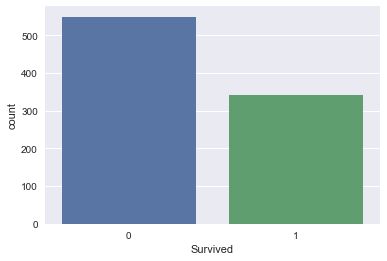

In [37]:
sns.countplot(x='Survived', data=df_train)
plt.show()

In [38]:
df_train['Percentage'] = 1 # this is a helper colume
df_train[['Percentage','Survived']].groupby('Survived').count().apply(lambda x: (100 * x)/x.sum())

,Percentage
Survived,
0,61.616162
1,38.383838


### Pclass vs. Survived

In [39]:
df_train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [40]:
df_train['Count'] = 1 # this is a helper colume
df_train[['Pclass','Survived','Count']].groupby(['Pclass','Survived']).count()

Count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

Apparantly, the smaller Pclass, the higher survive rate. Richer is better, right?

### Sex vs. Survived

In [41]:
df_train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [42]:
df_train[['Sex','Survived','Count']].groupby(['Sex','Survived']).count()

Count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

Female has way higher survive rate than male. Sex is another strong corelate feature to the survival.

### Pclass and Sex vs. Survived
Now let's combine the Pclass and Sex to see what we got.

In [43]:
df_train[['Pclass','Sex','Survived','Count']].groupby(['Pclass','Sex','Survived']).count()

Count
Pclass Sex    Survived       
1      female 0             3
              1            91
       male   0            77
              1            45
2      female 0             6
              1            70
       male   0            91
              1            17
3      female 0            72
              1            72
       male   0           300
              1            47

In [44]:
df_train[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

The female survive rate in Pclass 1 and 2 are similar, but Pclass 3 is way lower. Well, the story is the gate from Pclass 3 to the deck was locked at the very beginning. That's sad...

The male survive rate in Pclass 2 and 3 are similar, but Pclass 1 is way higher.

### Age vs. Survived
Let's take a look at the age. Many of the age information are missed. We will be need to fill it up.

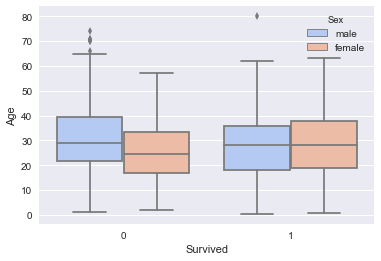

In [45]:
sns.boxplot(x='Survived', y='Age', hue='Sex',data=df_train, palette="coolwarm")
plt.show()

In [56]:
def SimplyAge(colage):
    colage = colage.fillna(-1)
    bins = (-2,0,5,10,20,35,60,100)
    colage = pd.cut(colage,bins)
    return colage

colage = SimplyAge(df_train['Age'])

# for test
df_train['Age'] = colage
dfage = df_train 
#dfage = pd.DataFrame()
#dfage['Age'] = colage
#dfage['Survived'] = df_train['Survived']


In [74]:
df_train[['Age','Survived','Count']].groupby(['Age','Survived']).count()

Count
Age       Survived       
(-2, 0]   0           125
          1            52
(0, 5]    0            13
          1            31
(5, 10]   0            13
          1             7
(10, 20]  0            71
          1            44
(20, 35]  0           193
          1           125
(35, 60]  0           117
          1            78
(60, 100] 0            17
          1             5

In [75]:
df_train[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
"(-2, 0]",0.293785
"(0, 5]",0.704545
"(5, 10]",0.350000
"(10, 20]",0.382609
"(20, 35]",0.393082
"(35, 60]",0.400000
"(60, 100]",0.227273


Well, the babys look have highest survive rate.

In [72]:
df_train[['Age','Survived','Sex','Count']].groupby(['Age','Sex','Survived']).count()

Count
Age       Sex    Survived       
(-2, 0]   female 0          17.0
                 1          36.0
          male   0         108.0
                 1          16.0
(0, 5]    female 0           5.0
                 1          16.0
          male   0           8.0
                 1          15.0
(5, 10]   female 0           7.0
                 1           3.0
          male   0           6.0
                 1           4.0
(10, 20]  female 0          12.0
                 1          34.0
          male   0          59.0
                 1          10.0
(20, 35]  female 0          24.0
                 1          87.0
          male   0         169.0
                 1          38.0
(35, 60]  female 0          16.0
                 1          54.0
          male   0         101.0
                 1          24.0
(60, 100] female 0           NaN
                 1           3.0
          male   0          17.0
                 1           2.0

In [71]:
df_train[['Age','Sex','Survived']].groupby(['Age','Sex']).mean()

Survived
Age       Sex             
(-2, 0]   female  0.679245
          male    0.129032
(0, 5]    female  0.761905
          male    0.652174
(5, 10]   female  0.300000
          male    0.400000
(10, 20]  female  0.739130
          male    0.144928
(20, 35]  female  0.783784
          male    0.183575
(35, 60]  female  0.771429
          male    0.192000
(60, 100] female  1.000000
          male    0.105263

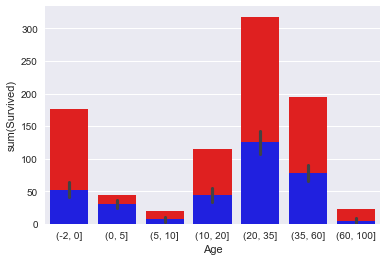

In [64]:
#sns.countplot(x='Age',hue='Survived',data=dfage)
sns.countplot(x='Age',data=dfage,color='Red')
sns.barplot(x='Age',y='Survived',data=dfage,estimator=np.sum,color='Blue')

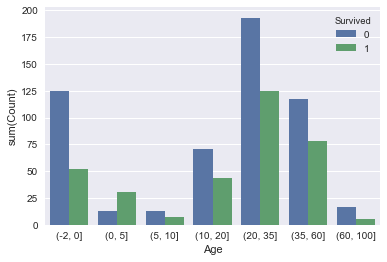

In [76]:
sns.barplot(x='Age',y='Count',hue='Survived',data=dfage,estimator=np.sum)

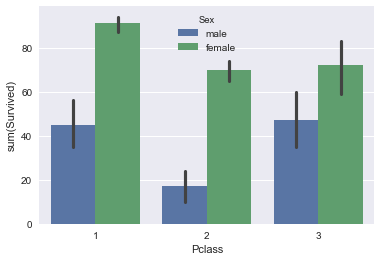

In [49]:
sns.barplot(x='Pclass', y='Survived', hue='Sex',data=df_train,estimator=np.sum)
plt.show()

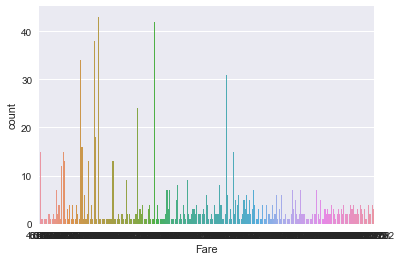

In [50]:
sns.countplot(x='Fare',data=df_train)
plt.show()